<a href="https://colab.research.google.com/github/omdgn/Data_Mining_Project/blob/main/COMP4462_project_Group5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    # Hücre 1: Veri Setini Yükleme ve İnceleme
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# Veri setini yükleme
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
data = pd.read_csv(url, names=columns, header=None)

# Veri setini inceleme
print("\n=== İlk 5 Satır ===\n")
print(data.head())
print("\n=== Veri Seti Bilgisi ===\n")
print(data.info())
print("\n=== Eksik Değer Kontrolü ===\n")
print(data.isnull().sum())


=== İlk 5 Satır ===

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

=== Veri Seti Bilgisi ===

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None

=== Eksik Değer Kontrolü ===

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: in

In [4]:

# Hücre 2: Outlier ve Inconsistency Kontrolü
# Outlier ve inconsistency kontrolü (örnek olarak 'doors' ve 'persons' alanlarında kontrol)
def check_values(column):
    unique_values = data[column].unique()
    print(f"\n'{column}' benzersiz değerler: {unique_values}")

check_values("doors")
check_values("persons")

# Tutarsızlıkları düzeltme (örneğin '5more' -> '5')
data["doors"] = data["doors"].replace("5more", "5").astype(int)
data["persons"] = data["persons"].replace("more", "5").astype(int)


'doors' benzersiz değerler: ['2' '3' '4' '5more']

'persons' benzersiz değerler: ['2' '4' 'more']


In [5]:
# Hücre 3: Kategorik Özellikleri Sayısallaştırma
# Kategorik özellikleri sayısallaştırma
label_encoders = {}
for column in ["buying", "maint", "lug_boot", "safety", "class"]:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [6]:
# Hücre 4: Normalizasyon (Standartlaştırma)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop("class", axis=1))
data_scaled = pd.DataFrame(scaled_features, columns=data.columns[:-1])
data_scaled["class"] = data["class"]

print("\n=== Normalize Edilmiş İlk 5 Satır ===\n")
print(data_scaled.head())


=== Normalize Edilmiş İlk 5 Satır ===

     buying     maint     doors   persons  lug_boot    safety  class
0  1.341641  1.341641 -1.341641 -1.336306  1.224745  0.000000      2
1  1.341641  1.341641 -1.341641 -1.336306  1.224745  1.224745      2
2  1.341641  1.341641 -1.341641 -1.336306  1.224745 -1.224745      2
3  1.341641  1.341641 -1.341641 -1.336306  0.000000  0.000000      2
4  1.341641  1.341641 -1.341641 -1.336306  0.000000  1.224745      2


In [7]:
# Hücre 5: PCA Uygulaması
# Özellik seçimi veya boyut indirgeme (örneğin PCA ile 2 bileşen indirgeme)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(data_scaled.drop("class", axis=1))
data_pca = pd.DataFrame(pca_features, columns=["PCA1", "PCA2"])
data_pca["class"] = data_scaled["class"]

print("\n=== PCA Uygulanmış Veri İlk 5 Satır ===\n")
print(data_pca.head())


=== PCA Uygulanmış Veri İlk 5 Satır ===

       PCA1      PCA2  class
0  1.486939  0.097582      2
1  1.486938  0.095835      2
2  1.486940  0.099328      2
3  1.486954  0.128978      2
4  1.486953  0.127231      2


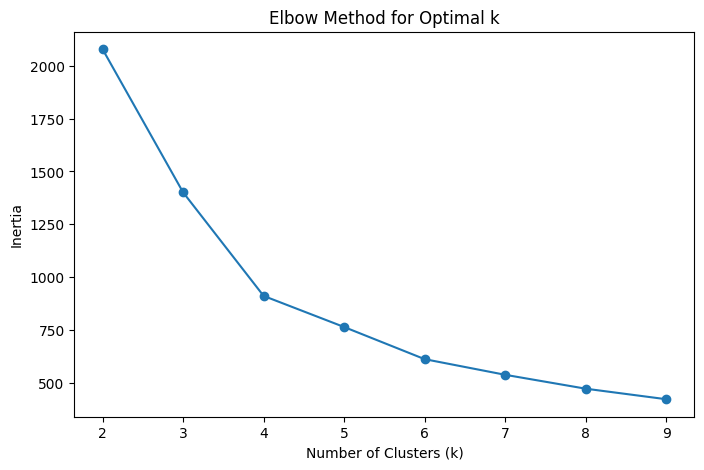

In [8]:
# Hücre 1: K-Means Kümeleme Uygulaması
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# PCA uygulanmış veriyi kullanarak K-Means kümeleme
X = data_pca.drop("class", axis=1)

# Küme sayısını belirlemek için dirsek yöntemi
inertia = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker="o")
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [9]:
# Hücre 2: Optimal K ile K-Means Uygulaması ve Silhouette Skoru
optimal_k = 4  # Elbow method ile belirlenen küme sayısı
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Silhouette Skoru Hesaplama
silhouette_avg = silhouette_score(X, kmeans_labels)
print(f"Silhouette Score for k={optimal_k}: {silhouette_avg}")

Silhouette Score for k=4: 0.40750157886541744


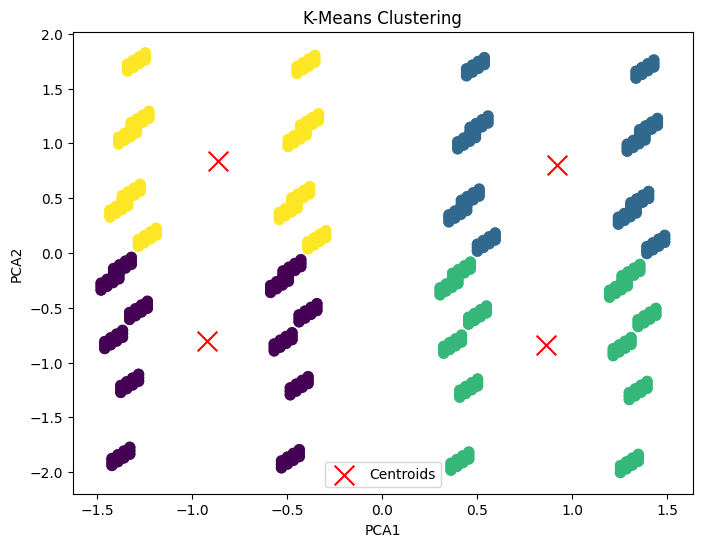

In [10]:
# Hücre 3: Küme Sonuçlarının Görselleştirilmesi
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans_labels, cmap="viridis", s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="x", s=200, label="Centroids")
plt.title("K-Means Clustering")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()


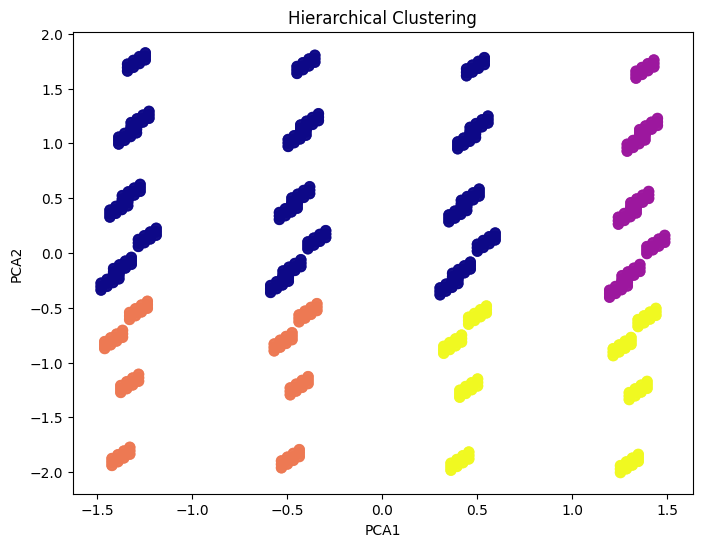

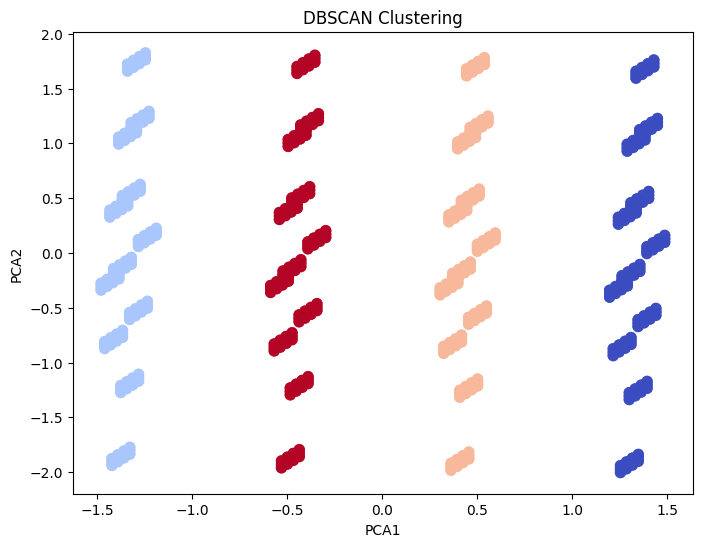

In [11]:
# Hücre 4: Diğer Kümeleme Algoritmaları (Hierarchical ve DBSCAN)
from sklearn.cluster import AgglomerativeClustering, DBSCAN

# Hiyerarşik Kümeleme
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
h_labels = hierarchical.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=h_labels, cmap="plasma", s=50, alpha=0.7)
plt.title("Hierarchical Clustering")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

# DBSCAN Kümeleme
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=dbscan_labels, cmap="coolwarm", s=50, alpha=0.7)
plt.title("DBSCAN Clustering")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

In [12]:
# Hücre 5: Association Rule Mining - Apriori Algoritması
from itertools import combinations
from collections import defaultdict
import pandas as pd

# Transaction formatına dönüştürme (son sütunu hariç bırak)
transactions = data.iloc[:, :-1].applymap(str).values.tolist()

# Minimum destek ve güven
min_support = 0.1
min_confidence = 0.5

# Frekans hesaplama (1'li itemsetler)
num_transactions = len(transactions)
item_counts = defaultdict(int)

for transaction in transactions:
    for item in transaction:
        item_counts[frozenset([item])] += 1

# İlk aşama: Destek değeri yeterli olan öğeleri seç
supported_items = {itemset: count / num_transactions for itemset, count in item_counts.items() if count / num_transactions >= min_support}

# Apriori iterasyonu (2'li, 3'lü ... n'li kombinasyonlar)
k = 2
while True:
    candidate_itemsets = list(combinations(set().union(*supported_items.keys()), k))
    item_counts = defaultdict(int)

    for transaction in transactions:
        transaction_set = set(transaction)
        for candidate in candidate_itemsets:
            candidate_set = frozenset(candidate)
            if candidate_set.issubset(transaction_set):
                item_counts[candidate_set] += 1

    # Destek değeri yeterli olanları sakla
    new_supported_items = {itemset: count / num_transactions for itemset, count in item_counts.items() if count / num_transactions >= min_support}

    if not new_supported_items:  # Eğer yeni desteklenen öğe kalmadıysa dur
        break

    supported_items.update(new_supported_items)
    k += 1

# İlişkilendirme kurallarını oluştur
rules = []
for itemset in supported_items.keys():
    if len(itemset) > 1:  # Tekli öğeleri ele
        for antecedent in combinations(itemset, len(itemset) - 1):
            antecedent = frozenset(antecedent)
            consequent = itemset - antecedent

            confidence = supported_items[itemset] / supported_items[antecedent]
            if confidence >= min_confidence:
                rules.append((antecedent, consequent, confidence))

# Kuralları yazdırma
print("\n=== Association Rules (Apriori) ===\n")
for i, (lhs, rhs, confidence) in enumerate(sorted(rules, key=lambda x: -x[2])):
    if i >= 10:  # İlk 10 kuralı göster
        break
    print(f"Rule: {', '.join(lhs)} -> {', '.join(rhs)}, Confidence: {confidence:.2f}")



=== Association Rules (Apriori) ===

Rule: 1, 0 -> 2, Confidence: 0.82
Rule: 1, 3 -> 2, Confidence: 0.81
Rule: 0, 3 -> 2, Confidence: 0.81
Rule: 1, 4 -> 2, Confidence: 0.80
Rule: 0, 4 -> 2, Confidence: 0.80
Rule: 1, 5 -> 2, Confidence: 0.80
Rule: 0, 5 -> 2, Confidence: 0.80
Rule: 3, 4 -> 2, Confidence: 0.79
Rule: 5, 3 -> 2, Confidence: 0.79
Rule: 1, 0, 3 -> 2, Confidence: 0.76


<ipython-input-12-e0d285febc33>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transactions = data.iloc[:, :-1].applymap(str).values.tolist()


We derived association rules on the Car Evaluation dataset using the Apriori Algorithm. Min support: 0.1, min confidence: 0.5 were determined. First, we calculated the support values ​​of single items, then we created 2-, 3- and larger combinations with items with sufficient support. In the last stage, we determined the rules with high confidence levels. In the results we obtained, we observed that certain feature combinations established strong relationships. For example, the rule "1, 0 -> 2" showed the probability of vehicles with certain combinations to be evaluated in the "2" category with 82% confidence. The "2" result dominated in the first 10 rules, proving that there are strong relationships between the variables in the dataset.


=== Decision Tree ===

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        83
           1       0.62      0.91      0.74        11
           2       1.00      1.00      1.00       235
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.90      0.94      0.91       346
weighted avg       0.98      0.97      0.98       346


=== k-NN ===

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        83
           1       0.71      0.91      0.80        11
           2       0.99      0.97      0.98       235
           3       1.00      0.82      0.90        17

    accuracy                           0.96       346
   macro avg       0.90      0.91      0.90       346
weighted avg       0.96      0.96      0.96       346


=== Random Forest ===

              precision    recall  f1-score   support

           0

<ipython-input-13-523e7036ed45>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df["Model"], y=results_df[metric], palette="viridis")
<ipython-input-13-523e7036ed45>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df["Model"], y=results_df[metric], palette="viridis")
<ipython-input-13-523e7036ed45>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df["Model"], y=results_df[metric], palette="viridis")
<ipython-input-13-523e7036ed45>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated 

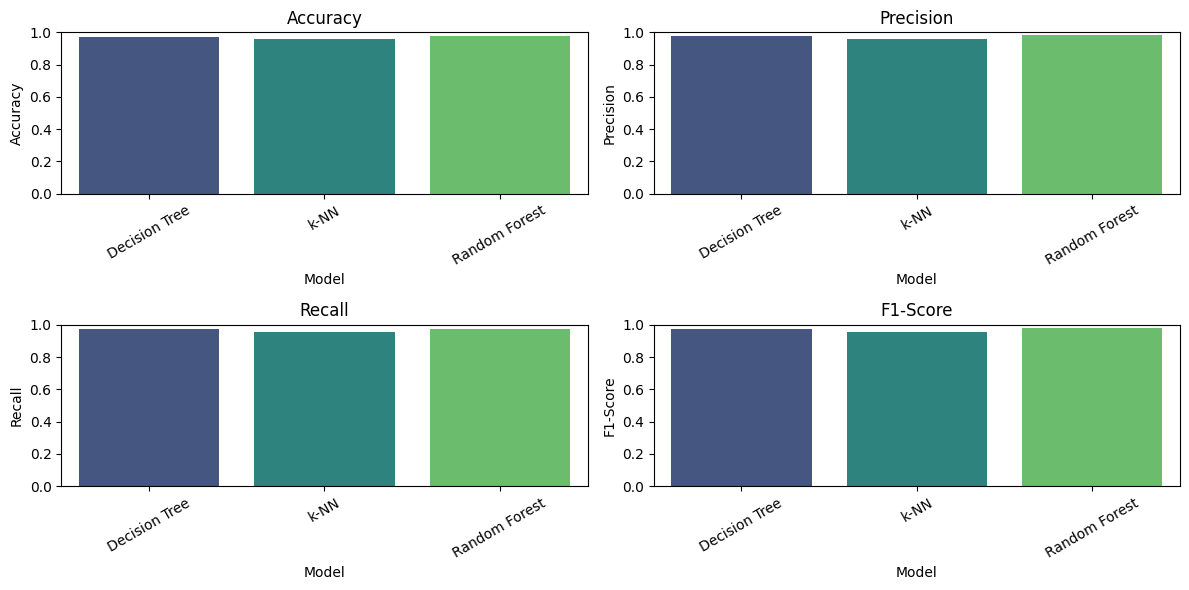

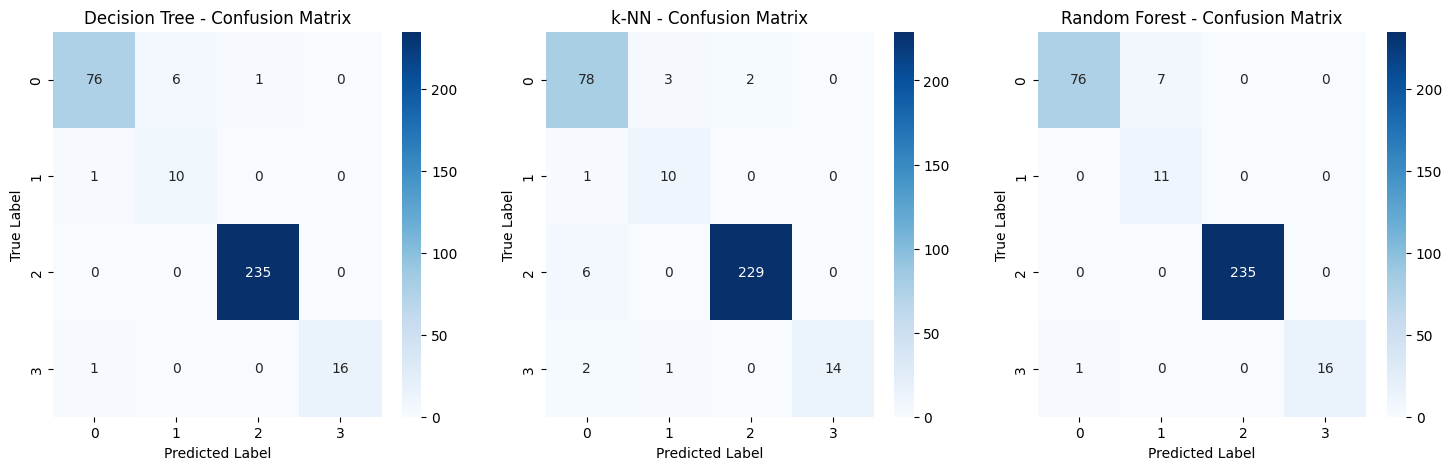

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# **Eğitim ve test setine ayırma**
X = data_scaled.drop("class", axis=1)
y = data_scaled["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Modellerin Tanımlanması**
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(random_state=42),
}

# **Modellerin Eğitimi ve Değerlendirilmesi**
results = []
conf_matrices = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average="weighted", zero_division=0)
    recall = recall_score(y_test, predictions, average="weighted", zero_division=0)
    f1 = f1_score(y_test, predictions, average="weighted", zero_division=0)

    # Confusion Matrix kaydetme
    conf_matrices[name] = confusion_matrix(y_test, predictions)

    results.append([name, accuracy, precision, recall, f1])

    print(f"\n=== {name} ===\n")
    print(classification_report(y_test, predictions, zero_division=0))

# **Sonuçları Tabloya Dökelim**
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print("\n=== Model Performans Karşılaştırması ===\n")
print(results_df)

# **Görselleştirme: Model Performans Grafikleri**
plt.figure(figsize=(12, 6))
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=results_df["Model"], y=results_df[metric], palette="viridis")
    plt.title(metric)
    plt.ylim(0, 1)
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

# **Confusion Matrix Görselleştirme**
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, (name, matrix) in enumerate(conf_matrices.items()):
    ax = axes[i]
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"{name} - Confusion Matrix")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

plt.show()


We performed classification analysis on the Car Evaluation dataset using Decision Tree, k-Nearest Neighbor (k-NN) and Random Forest models. We compared model performances by accuracy, precision, recall and F1-score metrics. Random Forest model showed the best performance with 97.69% accuracy rate, followed by Decision Tree (97.39%) and k-NN (95.66%). Random Forest and Decision Tree models gave excellent results especially for class 2 (F1-score = 1.00). However, the recall values ​​for class 1 varied as 91% in k-NN, 100% in Random Forest, and 91% in Decision Tree, which shows that the models handle rare classes differently. In general, Random Forest can be preferred since it exhibits the best performance in all metrics.